# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**c.** The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [5]:
(df.query('converted==1').count())/(df.user_id.count())

user_id         0.119659
timestamp       0.119659
group           0.119659
landing_page    0.119659
converted       0.119659
dtype: float64

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
df.query('group == "treatment" and landing_page != "new_page"').count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

**f.** Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.query('group == "treatment" and landing_page == "new_page"')
df2.count()

user_id         145311
timestamp       145311
group           145311
landing_page    145311
converted       145311
dtype: int64

In [9]:
df.query('group == "control" and landing_page == "old_page"').count()

user_id         145274
timestamp       145274
group           145274
landing_page    145274
converted       145274
dtype: int64

In [10]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.query('group == "treatment" and landing_page == "new_page"')
df2 = df2.append(df.query('group == "control" and landing_page == "old_page"'))
df2.count()

user_id         290585
timestamp       290585
group           290585
landing_page    290585
converted       290585
dtype: int64

In [11]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [12]:
df2.query('group == "control" and landing_page == "new_page"').head()

,user_id,timestamp,group,landing_page,converted


### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [13]:
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2['duplicated'] = df2.user_id.duplicated()
df2.query('duplicated == True')

,user_id,timestamp,group,landing_page,converted,duplicated
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,True


**c.** Display the rows for the duplicate **user_id**? 

In [15]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted,duplicated
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,False
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,True


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [16]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2 = df2.drop([2893])
# Check again if the row with a duplicate user_id is deleted or not
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted,duplicated
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,False


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>


In [17]:
(df2.query('converted == 1').count())/(df2.count())

user_id         0.119597
timestamp       0.119597
group           0.119597
landing_page    0.119597
converted       0.119597
duplicated      0.119597
dtype: float64

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
control = df2.query('group == "control"')
control_diff = (control.query('converted == 1').count()['user_id'])/(control.count()['user_id'])
control_diff

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
treatment = df2.query('group == "treatment"')
treatment_diff = (treatment.query('converted == 1').count()['user_id'])/(treatment.count()['user_id'])
treatment_diff

0.11880806551510564

In [20]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = treatment_diff - control_diff
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [21]:
(df2.query('landing_page == "new_page"').count())/(df2.count())

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
duplicated      0.500062
dtype: float64

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

><font size="3" color='slategrey'> With the negative observed difference of 0.0015, **no** the new Treatment group did not produce more conversions. 

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

><font size="3" color='slategrey'> **$H_0$**  The conversion rate of the old site will be the same or greater than the new site.   **$p_{old}$** >=**$p_{new}$**

><font size="3" color='slategrey'> **$H_1$**  The conversion rate of the new site is greater than the old site.   **$p_{old}$** < **$p_{new}$**

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [22]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [23]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [24]:
n_new = df2.query('landing_page == "new_page"').count()['user_id']
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [25]:
n_old = df2.query('landing_page == "old_page"').count()['user_id']
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [26]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0, 1], size = n_new, p = (p_new, 1-p_new))
new_page_converted

array([1, 1, 1, ..., 1, 1, 0])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [27]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0, 1], size = n_old, p = (p_old, 1-p_old))
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [28]:
converted_diff = new_page_converted.mean() - old_page_converted.mean()
converted_diff

0.00082826521515966256


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [29]:
# Sampling distribution 
p_diffs = []
size = df2.shape[0]
for _ in range(10000):
    #new_page_converted = np.random.choice([0, 1], size = n_new, p = (p_new, 1-p_new))
    #old_page_converted = np.random.choice([0, 1], size = n_old, p = (p_old, 1-p_old))
    converted_diff = (np.random.choice([0, 1], size = n_new, p = (p_new, 1-p_new)).mean()) - (np.random.choice([0, 1], size = n_old, p = (p_old, 1-p_old)).mean())
    p_diffs.append(converted_diff)    
p_diffs = np.array(p_diffs)
p_diffs.mean()

1.0347824308837572e-05

><font size="3" color='slategrey'> This number varies slightly each iteration. Every case, the p_diff mean is to the negative exponential indicating a small difference between New and Old.  

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

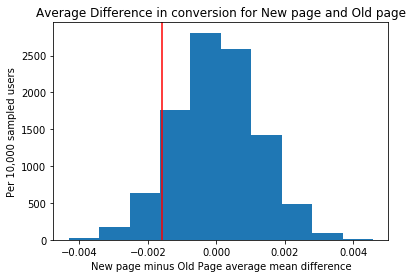

In [30]:
plt.hist(p_diffs)
plt.axvline(obs_diff, c='r')
plt.title('Average Difference in conversion for New page and Old page')
plt.xlabel('New page minus Old Page average mean difference')
plt.ylabel('Per 10,000 sampled users');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

0.90700000000000003

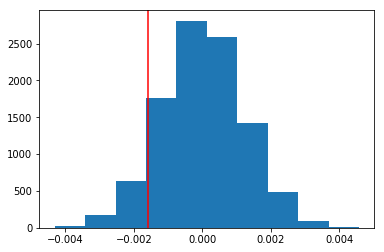

In [31]:
pvalue = (p_diffs > obs_diff).mean()

plt.hist(p_diffs);
plt.axvline(obs_diff, color='red');
pvalue

In [39]:
(p_diffs.mean() + (p_diffs.mean() - obs_diff) < p_diffs).mean()

0.092799999999999994

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

><font size="3" color='slategrey'> This is the P value.  This will show the probablility that 90% of the time, the value is in a favor of the null hypothosis. Since the value is greater than .05, we should not reject the Null Hypthosis.




**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [32]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('landing_page == "old_page"')['converted'].sum()

# number of conversions with the new_page
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()

# number of individuals who were shown the old_page
n_old = df2.query('landing_page == "old_page"')['converted'].count()

# number of individuals who received new_page
n_new = df2.query('landing_page == "new_page"')['converted'].count()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 

In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

 

In [40]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative ='smaller')
print(z_score, p_value)

-1.31092419842 0.094941687241


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>
In the two sample test, **smaller** means that the alternative hypothesis is p1 < p2 and larger means p1 > p2 where p1 is the proportion of the first sample and p2 of the second one.

convert_old: number of conversions with the old_page

convert_new: number of conversions with the new_page

n_old: number of individuals who were shown the old_page

n_new: number of individuals who were shown the new_page


><font size="3" color='slategrey'>  The z-score gives a deviation from the mean in which a value is located. In this instance, the P value is 1.3 'steps' to the left (negative) of the mean. 
    
><font size="3" color='slategrey'> The differene of this value to the above P Value is how it's explained. The p value above identifies 90% of the outcomes will be greater than this value. This calculates that 1.3 steps to the left is the P value to which  9.4% of the outcomes will continue towards the left. 
    
><font size="3" color='slategrey'> Below you'll see 90.7% is greater than the red line and 9.4% is smaller 

0.90700000000000003

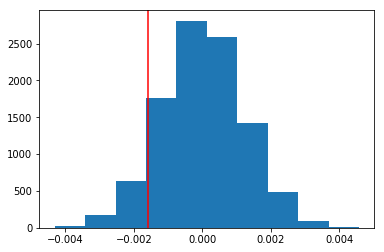

In [46]:
pvalue = (p_diffs > obs_diff).mean()

plt.hist(p_diffs);
plt.axvline(obs_diff, color='red');
#plt.axvline(p_diffs.mean() + (p_diffs.mean()-obs_diff), color='green')
pvalue

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

><font size="3" color='slategrey'>  This would be a logistic regression because the outcome we need to determine is that of 2 outcomes, the New site or the Old site.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [47]:
df2['intercept'] = 1
df2[['cdrop', 'ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop(columns=['cdrop'])
df2.head()

,user_id,timestamp,group,landing_page,converted,duplicated,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,False,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,False,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,False,1,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [68]:
lm = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results1 = lm.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [69]:
results1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-11-16 15:32 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [71]:
np.exp(results1.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


><font size="3" color='slategrey'> The P value is .1899. This P Value differes as it identifies the left of the bell AND the right of the bell.  .1899/2 = .0949, which matches the P Value found with the Z-Score and 90.7% (which is the P value 1st presented) of the results will still be to the right of the .094 P value. 

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

><font size="3" color='slategrey'> Factors such as what the customer is used to and how they feel about change may affect someone's willing next to convert. If they were used to the old page and recieved the old page, they may be quick to find what they want and continue.  If they were on the new page, but never there before, they may not be as quick as it's the first time viewing page.  Additionally, taking an old page user and placing them on the new page may affect the results also as to the person's willingness to change. Using this information to review if a user converts more on an old page vs new page may save a company money on fully producing and implementing a new page to realize the new page is not as successful as the old. 
    
><font size="3" color='slategrey'> Taking into account other factors, such as location, may show a strong dominance of one page over the other.  For example, maybe the amount of bandwidth needed to load the pages differs and some countries have a stronger bandwidth than others. This may affect the loading of the page and the probablility a consumer will convert.  Afterall, if the page wont load at all, they are going to have a hard time purchasing. This is just a possible example.  Below will review on each country may be affected by the different pages and conversion.   

><font size="3" color='slategrey'> Disadvantage to adding addtional terms into a regression model is remembering the intercepts and interpreting the results correctly. Adding additonal terms may also cause data to lean a preferred direction.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [72]:
# Read the countries.csv
dfc = pd.read_csv('countries.csv')
dfc.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [73]:
df2.head()

,user_id,timestamp,group,landing_page,converted,duplicated,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,False,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,False,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,False,1,1


In [74]:
# Join with the df2 dataframe
df_merged = df2.join(dfc.set_index('user_id'), on = 'user_id')
df_merged.head()

,user_id,timestamp,group,landing_page,converted,duplicated,intercept,ab_page,country
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1,US
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,False,1,1,CA
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,False,1,1,UK
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,False,1,1,CA


In [75]:
# to ensure I capture all the columns needed :)
countryCols = df_merged.country.unique().tolist()
countryCols = sorted(countryCols)   
countryCols

['CA', 'UK', 'US']

In [76]:
# Create the necessary dummy variables
df_merged[countryCols] = pd.get_dummies(df_merged['country'])
df_merged.head()

,user_id,timestamp,group,landing_page,converted,duplicated,intercept,ab_page,country,CA,UK,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,False,1,1,CA,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,False,1,1,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,False,1,1,CA,1,0,0


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

In [78]:
# Fit your model, and summarize the results
lm = sm.Logit(df_merged['converted'], df_merged[['intercept','ab_page','CA', 'UK']])
results2 = lm.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-11-16 16:06 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

In [79]:
np.exp(results2.params)

intercept    0.136795
ab_page      0.985168
CA           0.960062
UK           1.009932
dtype: float64

><font size="3" color='slategrey'> Holding all else constant, someone in the UK on the old page is 1.0099 likely to convert than in the US.

In [81]:
lm = sm.Logit(df_merged['converted'], df_merged[['intercept','ab_page','CA', 'US']])
results3 = lm.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-11-16 16:15 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
US           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
==================================================================

"""

In [83]:
1/np.exp(results3.params)

intercept    7.238314
ab_page      1.015056
CA           1.051944
US           1.009932
dtype: float64

><font size="3" color='slategrey'> I wanted to see if I picked a different intercept country how the numbers would change. 
><font size="3" color='slategrey'> It still shows the Us and Canada are slightly more likely to convert than the UK 
    
><font size="3" color='slategrey'> I'm going to merge the Treatment page and the Countries together to see if the new page does better than the old page per country in the converts.   

In [85]:
df_merged['CA_AB'] = df_merged['CA']*df_merged['ab_page']
df_merged['UK_AB'] = df_merged['UK']*df_merged['ab_page']
df_merged['US_AB'] = df_merged['US']*df_merged['ab_page']
df_merged.head()

,user_id,timestamp,group,landing_page,converted,duplicated,intercept,ab_page,country,CA,UK,US,CA_AB,UK_AB,US_AB
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1,US,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1,US,0,0,1,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,False,1,1,CA,1,0,0,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,False,1,1,UK,0,1,0,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,False,1,1,CA,1,0,0,1,0,0


In [86]:
lm = sm.Logit(df_merged['converted'], df_merged[['intercept','CA_AB','UK_AB', 'US_AB']])
results4 = lm.fit()
results4.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-11-16 16:55 AIC:              212778.9383
No. Observations:   290584           BIC:              212821.2568
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
CA_AB        -0.0827    0.0380    -2.1763  0.0295  -0.1571  -0.0082
UK_AB         0.0074    0.0180     0.4098  0.6819  -0.0279   0.0427
US_AB        -0.0183    0.0126    -1.4486  0.1475  -0.0430   0.0064
==================================================================

"""

In [88]:
np.exp(results4.params)

intercept    0.136863
CA_AB        0.920649
UK_AB        1.007417
US_AB        0.981901
dtype: float64

Intercept old page to the country/new page
><font size="3" color='slategrey'> With the merge of the New page and Country, the United Kingdom is the only country with a slightly higher conversion than the old page.
    
><font size="3" color='slategrey'>  Although, the P value for Canada is only .0295 in favor of rejecting the Null Hypothosis. 

In [89]:
1/np.exp(results4.params)

intercept    7.306593
CA_AB        1.086191
UK_AB        0.992638
US_AB        1.018432
dtype: float64

Reverse Intercept old page to the country/new page
><font size="3" color='slategrey'> Everything else staying consistant, the United States (1.01) and Canada(1.08) are slightly more likely on the Old page. 
    
    
<font size="3" color='slategrey'> To Recap:
    
1. The P Value prior to adding the countries maintained a .09 / .90 counterpart. 
2. The P Value for each country maintained above .05 EXCEPT for the merger of New page & Canada.   
    a. The CA_AB results are .92 likely to convert on the new page with a P Value of .02 to indicate to reject the null Hypothosis. 
    b.  The reversed results show Canada is 1.086 likely to convert with the old page. 
3. Of the 3 countries, the United Kingdom increased in likely to convert with the New Page. 

In Conclusion:
The P Value isn't significate in rejecting the Null Hypothisis for most instances.  The risk in losing the users that are familiar with the old page and losing their purchases/converts, along with any costs associated with the transition, isn't sufficient to advise the transition to the New Page

Fail to reject the following Hypothosis:
**$H_0$**  The conversion rate of the old site will be the same or greater than the new site.   **$p_{old}$** >=**$p_{new}$**

</font>
   

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [143]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0